# 데이터 로드 및 확인

In [9]:
from sklearn.datasets import load_iris
iris = load_iris()

x = iris.data[:, 2:]
# 4개의 독립변수 (꽃잎 & 꽃받침의 길이와 넓이) 중 2개 (꽃잎의 길이와 너비)만 쓸 것
# 시각화하고자 하는데 4차원은 그릴 수 없으므로 2차원의 군집 평면을 그리기 위함
y = iris.target

x.shape, y.shape

((150, 2), (150,))

# 최적의 K 찾기

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

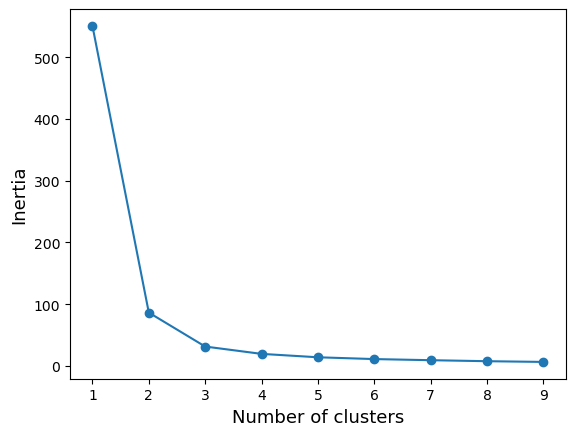

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 각 데이터와 할당된 클러스터의 중심점 간 제곱 거리의 합계를 저장할 배열
inertia_arr = []
k_range = range(1,10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=20)
    # n_cluster : 군집의 개수
    # random_state : (랜덤)임의의 최초 군집 중심점을 고정하기 위한 것
    kmeans.fit(x)
    # 모델 학습 : x_train, y_train이 아닌 x!!
    # 정답이 없으므로 x,y의 구분이 없으며, 학습-평가용 데이터 분할도 필요 없다.
    
    inertia = kmeans.inertia_
    # inertia_ : 데이터와 클러스터의 중심점 간 제곱 거리의 합계
    inertia_arr.append(inertia)
    # inertia_arr : 그래프의 y축
    
plt.plot(k_range, inertia_arr, marker='o')
# x축 : k-range / y축 : inertia_arr
plt.xlabel('Number of clusters', fontsize=13)
plt.ylabel('Inertia', fontsize=13)
plt.show

# 최적의 k = 3
# 붓꽃 데이터는 이미 3개의 종이라는 것을 알고 있으므로 k=3임을 확인 가능하지만
# 실제로는 정답이 없다.. ex) 소비 패턴에 따른 고객 군집 만들기

# K-Means Clustering 하기

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1]
cluster-0: 52
cluster-1: 48
cluster-2: 50


Text(0.5, 1.0, 'Predicted')

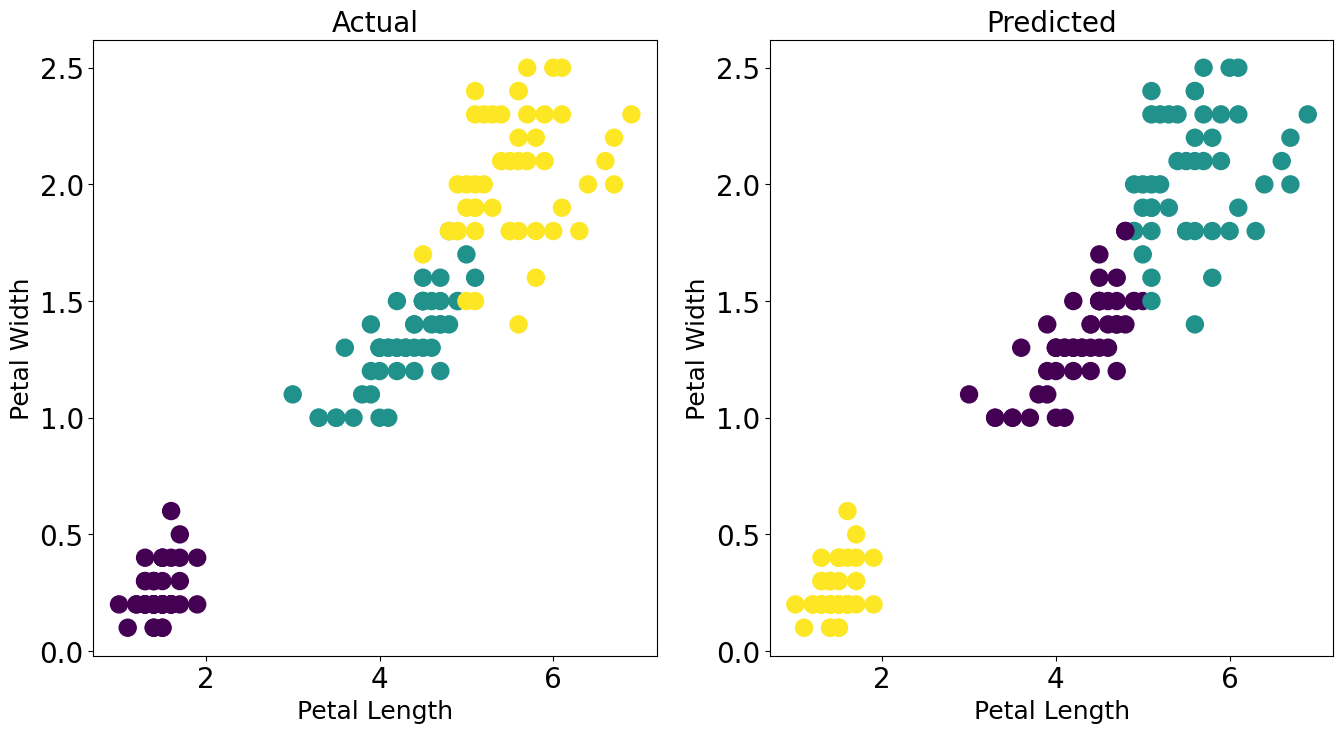

In [11]:
kmeans = KMeans(n_clusters=3, random_state=20)

# 모델 학습
kmeans.fit(x)

# 예측
y_hat = kmeans.labels_ # 군집의 번호
print(y_hat)
# 실제 붓꽃은 각 군집 별로 50개로 나누어져 있다.
# 2개의 독립변수만 갖고 분류하다보니, 일부 데이터가 실제 정답과는 다르게 분류되어있음을 알 수 있다.
print('cluster-0:', len(y_hat[y_hat==0]))
print('cluster-1:', len(y_hat[y_hat==1]))
print('cluster-2:', len(y_hat[y_hat==2]))




# 시각화
fig, axes = plt.subplots(1,2, figsize=(16,8)) # 1행2열

# 정답 데이터에 대한 산점도
axes[0].scatter(x[:,0], x[:,1], c=y, s=150)
# 2개의 feature만 사용했으므로, x축은 0번째 열 (꽃잎의 길이) // y축은 1번째 열 (꽃잎의 넓이)
# c : color
# c=y : 현재 y값이 0,1,2로 이루어져있으므로 unique 값마다 색상이 다르게 적용되어 총 3개의 색상으로 그려질 것
# s=150 : size는 150픽셀
axes[0].set_xlabel('Petal Length', fontsize=18)
axes[0].set_ylabel('Petal Width', fontsize=18)
# 일반적으로 레이블이나 타이틀 지정시 : plt.xlabel()
# 축 객체로 레이블이나 타이틀을 지정시 : axes.set_xlabel()
axes[0].tick_params(labelsize=20)
# 눈금의 크기 지정
axes[0].set_title('Actual', fontsize=20)


# K-Means Clusterting을 통해 예측한 결과에 대한 산점도
axes[1].scatter(x[:,0], x[:,1], c=y_hat, s=150)
# 2개의 feature만 사용했으므로, x축은 0번째 열 (꽃잎의 길이) // y축은 1번째 열 (꽃잎의 넓이)
# c : color
# c=y_hat : 현재 y_hat값이 2,0,1로 이루어져있으므로 unique 값마다 색상이 다르게 적용되어 총 3개의 색상으로 그려질 것
# s=150 : size는 150픽셀
axes[1].set_xlabel('Petal Length', fontsize=18)
axes[1].set_ylabel('Petal Width', fontsize=18)
# 일반 레이블 타이틀 지정시 : plt.xlabel()
# 축 객체로 레이블이나 타이틀을 지정시 : axes.set_xlabel()
axes[1].tick_params(labelsize=20)
# 눈금의 크기 지정
axes[1].set_title('Predicted', fontsize=20)



# 색상의 분포에 주목하세요
# Actual : 최초 50개에 대한 데이터 -> 그 다음 50개에 대한 데이터 -> 마지막 50개에 대한 데이터
# Predict : 중첩되어있는 부분에 있어서 혼돈이 있음 -> 즉, 3개의 품종으로 나누는데 있어서, 그 중 두 개의 품종은 나머지 하나의 품종과 확연히 다른 꽃잎의 길이와 넓이가 상당히 다름을 알 수 있다.



# 군집에 대한 시각화는 현실상 어렵다!
# 실제로는 feature가 여러 개니까 군집화는 가능하지만 군집에 대한 시각화는 어렵
# 다차원 데이터를 시각화하기 위해서는 차원을 축소해야한다. -> "주성분분석"

# 군집 평가

In [12]:
from sklearn.metrics import silhouette_samples, silhouette_score
# 모든 데이터에 대한 평균 실루엣 계수
import pandas as pd


# feature를 2개가 아닌 4개로 조정
kmeans = KMeans(n_clusters=3)
kmeans.fit(iris.data) # kmeans.fit(x)는 x=iris.data[:, 2:]이므로 피쳐가 2개였음

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['cluster'] = kmeans.labels_
iris_df.head()


# iris의 모든 개별 데이터에 대한 실루엣 계수 산출
score_samples = silhouette_samples(iris.data, kmeans.labels_)
iris_df['silhouette coef'] = score_samples
iris_df.head()
# 1에 가까울수록 군집이 잘 형성되었다고 평가한다


# 모든 데이터의 평균 실루엣 계수 산출
average_score = silhouette_score(iris.data, kmeans.labels_)
print(f'평균 실루엣 계수: {average_score:.3f}')
# 0.553은 나쁜 값은 아니다. 두 개의 품종이 붙어있어서 영향을 미쳤을 것


# 각 군집별 평균 실루엣 계수 산출
group_by_cluster = iris_df.groupby('cluster')['silhouette coef'].mean()
print(group_by_cluster)
# cluster의 번호는 중요하지 않으며 매번 상이할 수 있다.
# cluster의 개수와 각 계수만 파악하면 됨.

평균 실루엣 계수: 0.553
cluster
0    0.798140
1    0.417320
2    0.451105
Name: silhouette coef, dtype: float64


# 실루엣 계수를 이용한 군집 개수 최적화
1. elbow function을 통해 최적의 k 찾기
2. 실루엣 계수를 통해 최적의 k 찾기

In [13]:
def visualize_silhouette(cluster_lists, X_features): 

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

    # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

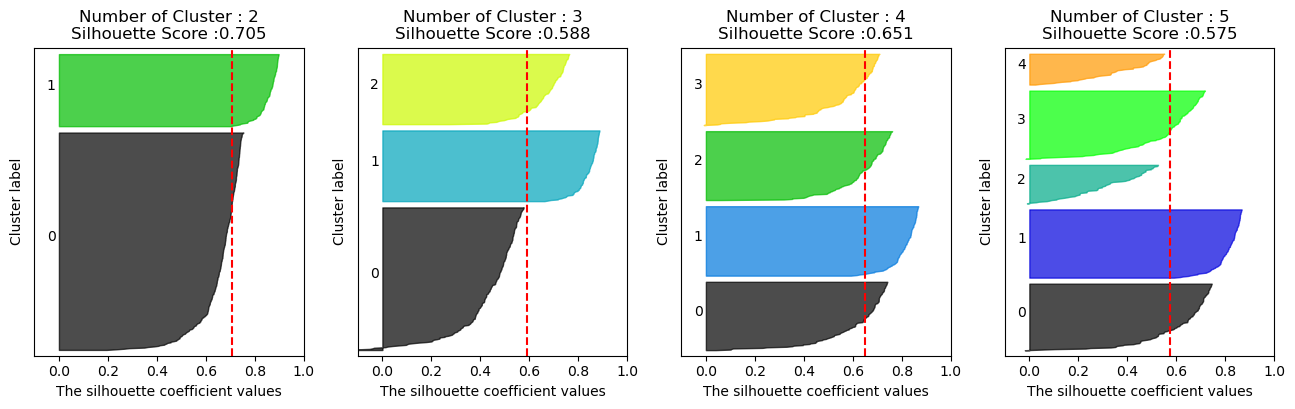

In [14]:
import numpy as np
from sklearn.datasets import make_blobs
# make_blobs : 랜덤하게 임의의 데이터를 만들어내는 함수


x, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, shuffle=True, random_state=1)
# clustering을 위한 4개의 군집 중심의 500개 2차원 데이터셋 생성
# centers : 4개의 군집 중심
# n_samples : 500개
# n_features : 2차원
# cluster_std : 표준편차 (데이터가 퍼져있는 정도)


# 시각화
visualize_silhouette([2,3,4,5], x)
# 애초에 4개 군집 중심으로 해서 데이터를 생성했기 때문에, 시각화 상으로도 최적의 k는 4로 나옴

# x : 독립변수 X_features
# def visualize_silhouette(cluster_lists, X_features)

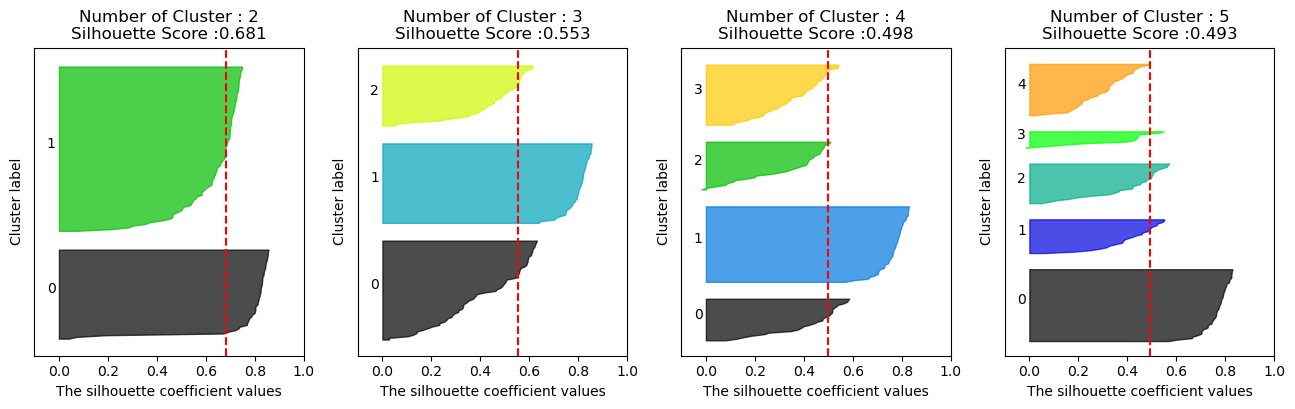

In [15]:
visualize_silhouette([2,3,4,5], iris.data)